<a href="https://colab.research.google.com/github/pSN0W/AI_Practice/blob/main/k'Fold_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mounting Drive and Loading Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np


In [3]:
os.getcwd()

'/content'

In [4]:
os.chdir("/content/drive/MyDrive/Toy_datasets")
os.getcwd()

'/content/drive/MyDrive/Toy_datasets'

In [5]:
concentric = np.array(pd.read_csv("concerticcir1.csv"))

In [6]:
concentric.shape

(99, 3)

In [8]:
X=concentric[:,:2]
Y=concentric[:,2]

#Importing Module

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection

#Simple Cross Validation

In [14]:
#Splitting it in train test and cross validation data

X_1,X_test,Y_1,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
X_train,X_cv,Y_train,Y_cv = train_test_split(X_1,Y_1,test_size=0.3,random_state=0)

In [15]:
#training the model

train_error=[]
cv_error=[]
k_values=[]

for i in range(1,30,2):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,Y_train)

  #Predict on Cross validation
  pred_cv=knn.predict(X_cv)

  #Predict on train
  pred_train=knn.predict(X_train)

  err_cv = 1 - accuracy_score(Y_cv,pred_cv)*float(1)
  err_train = 1 - accuracy_score(Y_train,pred_train)*float(1)

  train_error.append(err_train)
  cv_error.append(err_cv)
  k_values.append(i)

##Plotting Train-Test errors

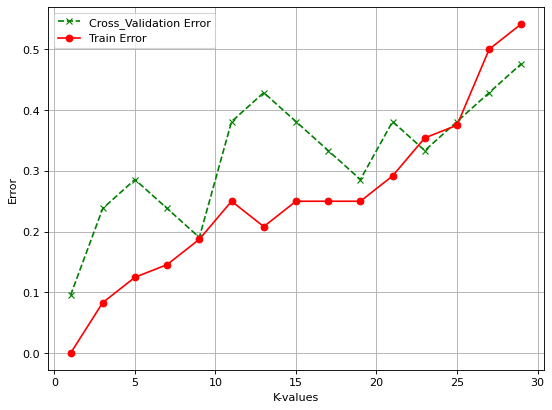

In [24]:
plt.figure(figsize=[8,6],dpi=80)
plt.plot(k_values,cv_error,'g--',marker='x',label="Cross_Validation Error")
plt.plot(k_values,train_error,'r',marker='o',label="Train Error")
plt.xlabel("K-values")
plt.ylabel("Error")
plt.grid()
plt.legend()

We get minimum error for k=1 so the k of our model will be 1

In [26]:
# making a KNN model for k=1

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)
pred_test = knn.predict(X_test)
acc_test = accuracy_score(Y_test,pred_test)*float(100)
print("The accuracy of the model is ",acc_test)

The accuracy of the model is  80.0


#10 Fold KNN

In [34]:
cv_score=[]
k_for_10_val=[]

for i in range(1,30,2):
  knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
  scores = cross_val_score(knn,X_train,Y_train,cv=10,n_jobs=-1,scoring="accuracy")
  cv_score.append(np.median(scores))
  k_for_10_val.append(i)


In [40]:
#Calulating Error

cv_score=np.array(cv_score)
cv_error_10_fold = 1-cv_score
optimal_k = k_for_10_val[np.argmin(cv_error_10_fold)]
print("The minimum error is for k = ",optimal_k)

The minimum error is for k =  3


##Plotting CV error

Text(0.5, 1.0, '10 fold CV error graph')

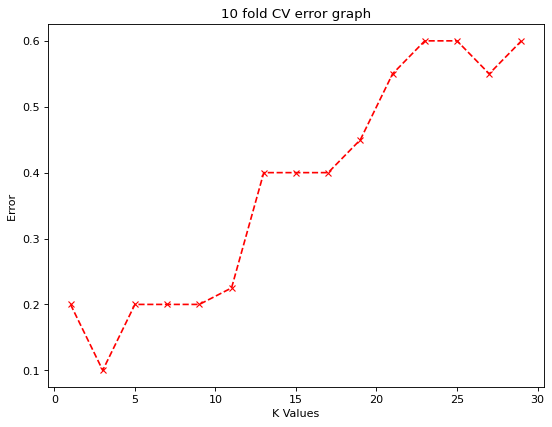

In [42]:
plt.figure(figsize=[8,6],dpi=80)
plt.plot(k_for_10_val,cv_error_10_fold,"r--",marker="x")
plt.xlabel("K Values")
plt.ylabel("Error ")
plt.title("10 fold CV error graph")

In [43]:
knn = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)
acc = accuracy_score(Y_test,pred)
print("The accuracy of the model is ",acc*100)

The accuracy of the model is  83.33333333333334
